In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pylab as plt 
import re
%matplotlib inline
data_path = "C:/Users/SpiffyApple/Documents/USC/Courses/Fall2016/PPD599/project/DATA_Nov2"

In [3]:
data_files = ['acs'+str(x)+'.csv' for x in np.linspace(2006, 2015, 11).astype(int)]
data_dict = {}

In [4]:
test_df = pd.read_csv("/".join([data_path, data_files[0]]), header=1, index_col=0).dropna().replace("%|\$|,", "", regex=True).astype(float).transpose()
test_df.columns = test_df.columns.str.lower()
test_df.index = test_df.index.str.extract("(\w+) city", expand=False)

In [5]:
for data_file in data_files:
    #print(data_file)
    if "csv" in data_file:
        key = re.findall("\d+", data_file)[0]
        data_dict[key] = pd.read_csv("/".join([data_path, data_file]), header=1, index_col=0).dropna().drop_duplicates().replace("%|\$|,", "", regex=True).astype(float).transpose()
        data_dict[key].columns = data_dict[key].columns.str.lower()
        data_dict[key].columns = [re.sub(" \([\w\s]+\)|\$|\:| or more", "", x) for x in data_dict[key].columns.tolist()]
        data_dict[key].columns = [re.sub("  ", " ", x) for x in data_dict[key].columns.tolist()]
        data_dict[key].columns = [re.sub("total population", "total", x) for x in data_dict[key].columns.tolist()]
        data_dict[key].index = data_dict[key].index.str.extract("(\w+) city", expand=False)
        print("data size of %s:" %key,data_dict[key].shape)

data size of 2006: (22, 57)
data size of 2006: (22, 57)
data size of 2007: (22, 56)
data size of 2008: (22, 56)
data size of 2009: (22, 56)
data size of 2010: (22, 53)
data size of 2011: (22, 55)
data size of 2012: (22, 56)
data size of 2013: (22, 56)
data size of 2014: (22, 56)
data size of 2015: (22, 56)


In [6]:
df = pd.concat(data_dict)

In [7]:
df.drop(np.nan, level=1,axis=0, inplace=True)

In [8]:
df.index.names = ['year', 'city']

In [9]:
df['total'].isnull().any()
print(df.shape)

(210, 57)


In [10]:
df['area'].fillna(df.loc['2009','area'], inplace=True)

In [11]:
df['area'].loc['2010'] = df['area'].loc['2008']

In [12]:
df.loc['2010', 'area']

city
Washington     NaN
Phoenix        NaN
Oakland        NaN
Jacksonville   NaN
Miami          NaN
Atlanta        NaN
Detroit        NaN
Minneapolis    NaN
Charlotte      NaN
Raleigh        NaN
Cleveland      NaN
Portland       NaN
Philadelphia   NaN
Pittsburgh     NaN
Memphis        NaN
Dallas         NaN
Worth          NaN
Houston        NaN
Antonio        NaN
Seattle        NaN
Milwaukee      NaN
Name: area, dtype: float64

In [13]:
df['prop_male'] = df['male'].div(df['total'])
df['prop_black'] = df['black or african american alone'].div(df['total'])
df['high_or_less'] = (df['less than high school'] + df['high school graduate']).div(df['population 25 years and over'])
df['rent_rate'] = df['renter occupied'].div(df['housing units'])
df['rent_to_income'] = df['median gross rent'].div(df['median household income'])
df['unemployment_rate'] = df['unemployed'].div(df['civilian population in labor force 16 years and over'])
df['foreign_rate'] = df['foreign born'].div(df['total'])
df['poverty_rate'] = df['living in poverty'].div(df['population age 18 to 64 for whom poverty status is determined'])

In [14]:
df.columns[df.columns.str.contains("\d+")]

Index(['10,000 to 14,999', '100,000 to 124,999', '125,000 to 149,999',
       '15,000 to 19,999', '150,000 to 199,999', '20,000 to 24,999', '200,000',
       '25,000 to 29,999', '30,000 to 34,999', '35,000 to 39,999',
       '40,000 to 44,999', '45,000 to 49,999', '50,000 to 59,999',
       '60,000 to 74,999', '75,000 to 99,999',
       'civilian population in labor force 16 years and over',
       'less than 10,000', 'population 25 years and over',
       'population age 18 to 64 for whom poverty status is determined'],
      dtype='object')

In [15]:
df.rename(columns={'10,000 to 14,999':'hh10to15', '100,000 to 124,999':'hh100to125', '125,000 to 149,999':'hh125to150',
       '15,000 to 19,999':'hh15to20', '150,000 to 199,999':'hh150to200', '20,000 to 24,999':'hh20to25', '200,000':'hh200over',
       '25,000 to 29,999':'hh25to30', '30,000 to 34,999':'hh30to35', '35,000 to 39,999':'hh35to40',
       '40,000 to 44,999':'hh40to45', '45,000 to 49,999':'hh45to50', '50,000 to 59,999':'hh50to60',
       '60,000 to 74,999':'hh60to75', '75,000 to 99,999':'hh75to100',}, inplace=True)

In [97]:
df['ami80'] = df['median household income']*.8
df['ami60'] = df['median household income']*.6
df['ami40'] = df['median household income']*.4
df['ami50'] = df['median household income']*.5

In [36]:
lower_bnds = df.columns[df.columns.str.contains("hh")].str.extract("hh(\d+)", expand=False).astype(int)*1e3
hh_cols = df.columns[ df.columns.str.contains("hh\d+")]

In [92]:
df.columns

Index(['hh10to15', 'hh100to125', 'hh125to150', 'hh15to20', 'hh150to200',
       'hh20to25', 'hh200over', 'hh25to30', 'hh30to35', 'hh35to40', 'hh40to45',
       'hh45to50', 'hh50to60', 'hh60to75', 'hh75to100',
       'american indian and alaska native alone', 'area', 'asian alone',
       'at or above poverty level', 'average commute to work',
       'average gross rent for renter-occupied housing units',
       'average household size', 'bachelor's degree',
       'black or african american alone',
       'civilian population in labor force 16 years and over',
       'doctorate degree', 'employed', 'female', 'foreign born',
       'high school graduate', 'households', 'housing units',
       'less than 10,000', 'less than high school', 'living in poverty',
       'male', 'master's degree', 'median gross rent',
       'median household income', 'native born',
       'native hawaiian and other pacific islander alone',
       'naturalized citizen', 'not a citizen', 'owner occupied',
     

In [102]:
def sum_ami(sub):
    return(sub[hh_cols[sub['ami50'][0]>lower_bnds]].sum(axis=1) + sub[hh_cols[sub['ami80'][0]<lower_bnds]].sum(axis=1) )
    

In [103]:
prop_ami = df.groupby(level=[0,1]).apply(sum_ami)
#sub = df.groupby(level=[0,1]).get_group(('2006', 'Washington'))

In [104]:
prop_ami.index = df.index

In [106]:
df['prop_50to80ami'] = prop_ami.div(df['total'])

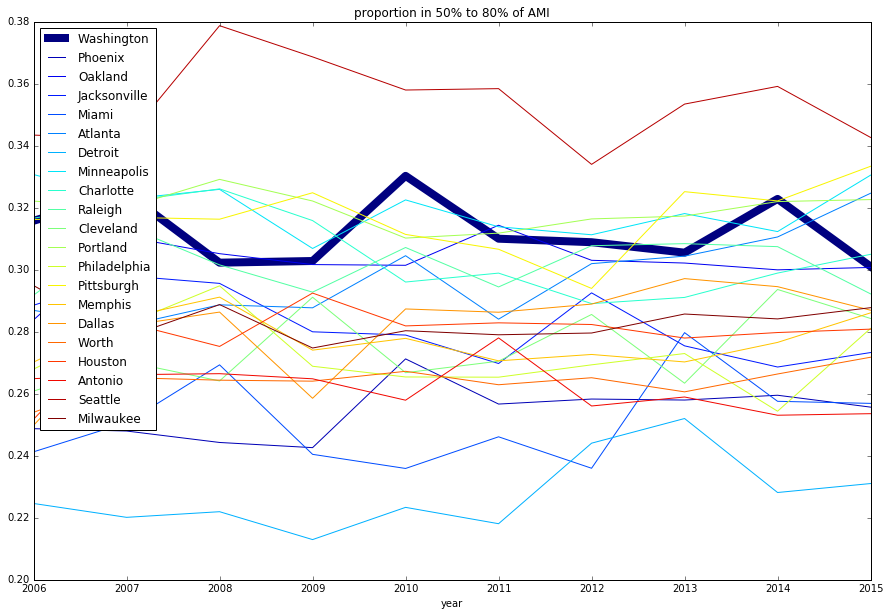

In [118]:
ax =df['prop_50to80ami'].unstack().plot(figsize =(15,10), colormap = 'jet')
ax.lines[0].set_linewidth(8)
plt.legend(loc='best')
plt.title("proportion in 50% to 80% of AMI")
plt.savefig("/".join([data_path, "prop_50to80ami.png"]))

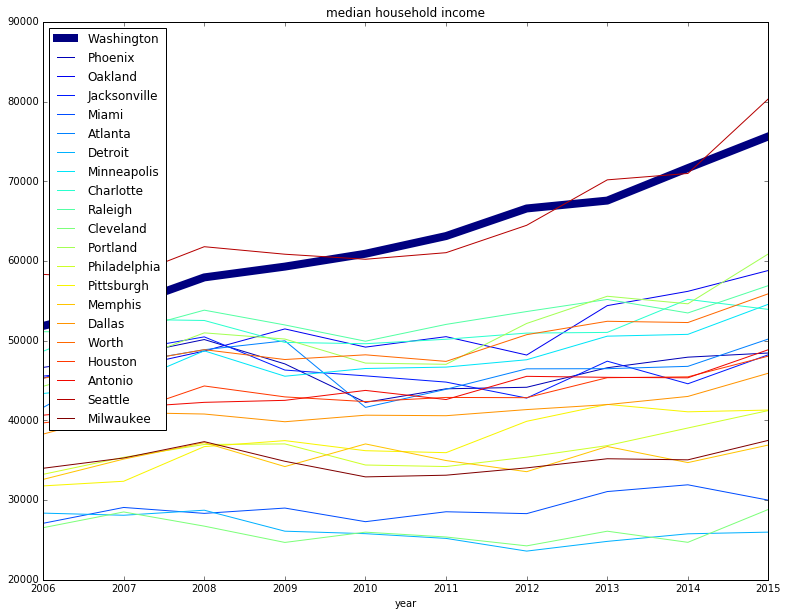

In [122]:
ax = df['median household income'].unstack().plot(figsize=(13,10), colormap='jet')
ax.lines[0].set_linewidth(8)
plt.legend(loc='best')
plt.title("median household income")
plt.savefig("/".join([data_path, "medianHHincome.png"]))

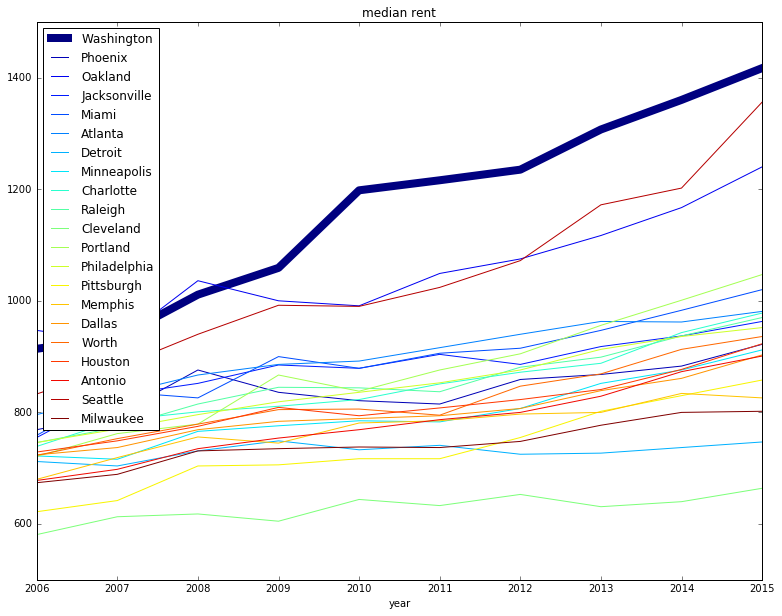

In [124]:
ax = df['median gross rent'].unstack().plot(figsize=(13,10), colormap='jet')
ax.lines[0].set_linewidth(8)
plt.legend(loc='best')
plt.title("median rent")
plt.savefig("/".join([data_path, "medianRent.png"]))

In [119]:
df.reset_index().to_csv("/".join([data_path,"data_2006_2015.csv"]))